<a href="https://colab.research.google.com/github/Chandayadav123/Chandayadav123/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# For data manipulation
import pandas as pd
import numpy as np
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"1613615-Stock_Price_data_set.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df
  
# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


In [4]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2018-02-05,7.740005,17.869995
2018-02-06,-18.020004,21.700012
2018-02-07,2.019989,8.120025
2018-02-08,16.979981,17.619995
2018-02-09,4.380005,19.690002


In [5]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
split_percentage = 0.8
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

In [7]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [8]:
df['Predicted_Signal'] = cls.predict(X)
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal
Date,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,7.740005,17.869995,1
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,-18.020004,21.700012,0
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2.019989,8.120025,1
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,16.979981,17.619995,1
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,4.380005,19.690002,1
...,...,...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,-25.170014,29.500000,0
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,-24.170014,32.940002,0
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,18.769989,25.500000,1


In [9]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [10]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [11]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,7.740005,17.869995,1,NaN,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,-18.020004,21.700012,0,0.045072,0.045072,0.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2.019989,8.120025,1,-0.004366,-0.000000,0.040706
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,16.979981,17.619995,1,-0.054657,-0.054657,-0.013950
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,4.380005,19.690002,1,-0.002519,-0.002519,-0.016469
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,-25.170014,29.500000,0,0.111302,0.111302,0.872051
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,-24.170014,32.940002,0,0.070211,0.000000,0.942262
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,18.769989,25.500000,1,-0.060486,-0.000000,0.881776


In [12]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,7.740005,17.869995,1,NaN,NaN,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,-18.020004,21.700012,0,0.045072,0.045072,0.045072,0.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2.019989,8.120025,1,-0.004366,-0.000000,0.040706,0.045072
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,16.979981,17.619995,1,-0.054657,-0.054657,-0.013950,-0.009585
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,4.380005,19.690002,1,-0.002519,-0.002519,-0.016469,-0.012104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,-25.170014,29.500000,0,0.111302,0.111302,0.872051,1.401256
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,-24.170014,32.940002,0,0.070211,0.000000,0.942262,1.401256
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,18.769989,25.500000,1,-0.060486,-0.000000,0.881776,1.401256


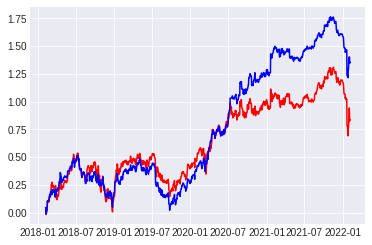

In [13]:
#Plot Strategy Returns vs Original Returns
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')